# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

🙇🏻 Which variables are significant in predicting the demand for shared bikes.

🙇🏻 How well those variables describe the bike demands

In [39]:
#First, we import the necesary libraries used for assignment.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading & Understanding Data

### Data Dictionary

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)

In [2]:
#Reading the data
bike_df = pd.read_csv('day.csv')
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


##### Data has 730 rows and 16 columns

In [3]:
#checking out the detailed info of the dataset.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
bike_df.describe()
#Gives all the statistics info of the dataset.

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#checking the size of the dataset.
bike_df.size

11680

## Data Cleaning

##### Now we drop the columns that are not useful for the data analysis.

instant: it is the index column that is not useful during data analysis 

dteday: data in this feature also contain in other features also like yr, month and weekday

casual and registered: cnt is available for this which is sum of both of these features

In [6]:
#checking if there is any null value in the dataset
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

🥲 There's no null values so we don't need to replace any value.

In [7]:
bike_df.drop(['instant'], axis=1,inplace=True)

bike_df.drop(['dteday'], axis=1,inplace=True)

bike_df.drop(['casual'], axis=1,inplace=True)

bike_df.drop(['registered'], axis=1,inplace=True)

In [8]:
#inspecting after droping the non useful columns from the dataset
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
bike_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


<AxesSubplot:>

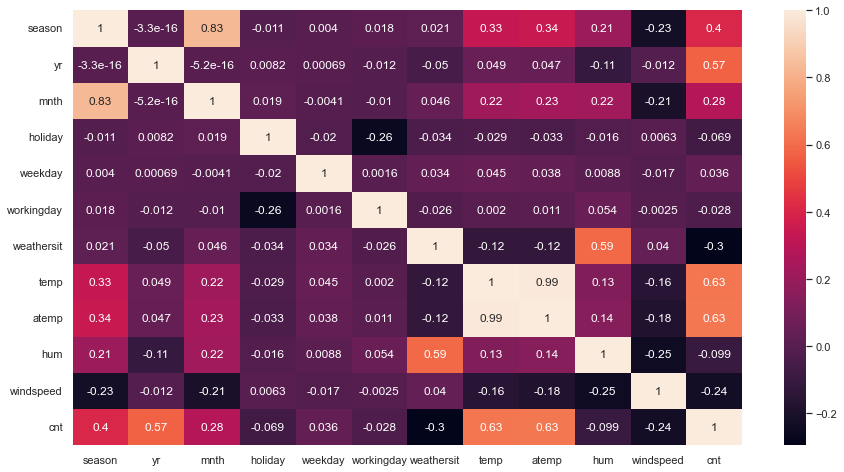

In [10]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(bike_df.corr(), annot=True)

### Handling Outliers

In [11]:
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

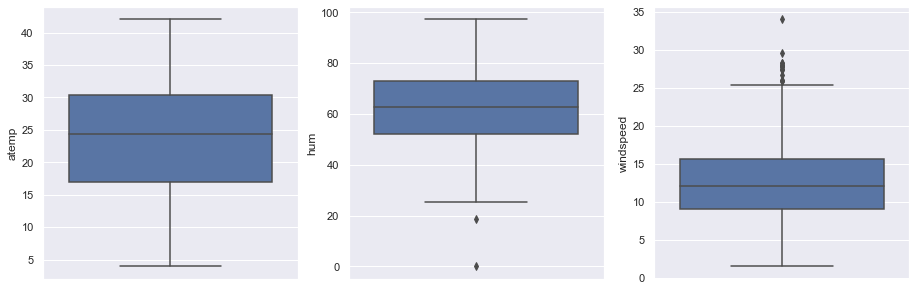

In [12]:
cols = ['atemp', 'hum', 'windspeed']
plt.figure(figsize=(21,5))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

#### From above plots we can see there are no outliers.

## EDA

In [13]:
#Now changing categorical columns which are numerically shown in the data to categorical ones to make it more meaningful.
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)
bike_df.weathersit.replace({1:"good", 2:"moderate", 3:"bad", 4:"severe"}, inplace=True)
bike_df.mnth = bike_df.mnth.replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep',
                                     10:'oct', 11:'nov', 12:'dec'})
bike_df.weekday = bike_df.weekday.replace({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Now time to draw pairplots to see linear relationship between functions

<Figure size 1080x2160 with 0 Axes>

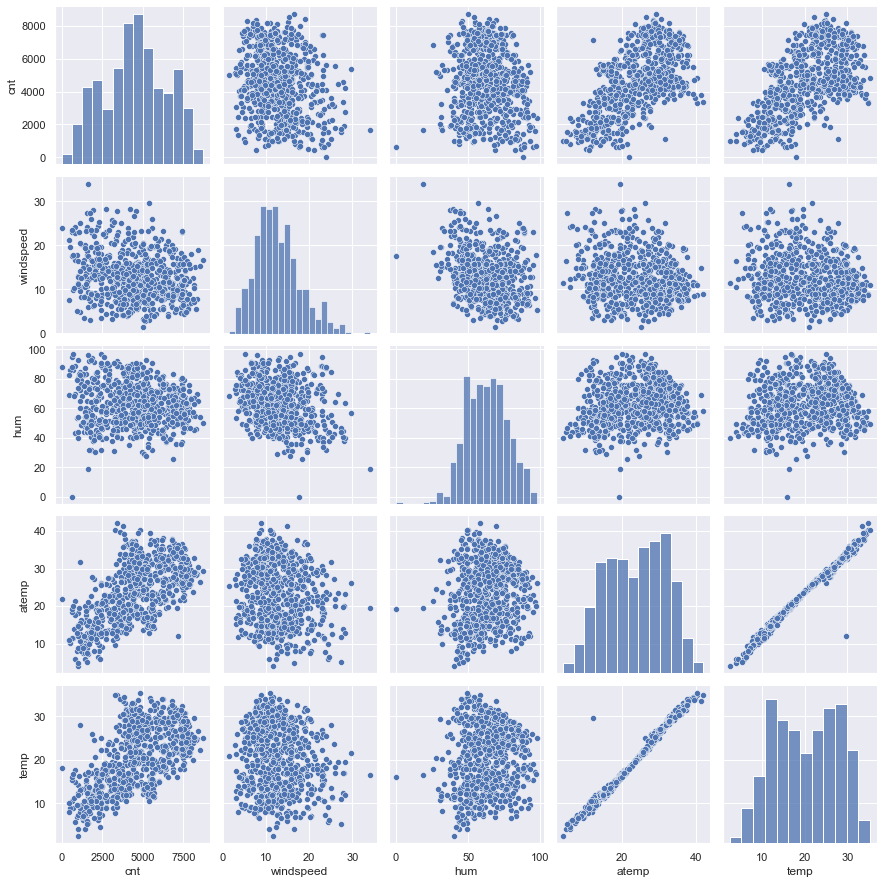

In [14]:
plt.figure(figsize=(15,30))
sns.pairplot(data=bike_df, vars=['cnt', 'windspeed', 'hum', 'atemp', 'temp'])
plt.show()

###### So from the above plots we can clearly see there is high correlation between temp and atemp and there is linear relationship between them.

### Heatmap for correlation between numeric values

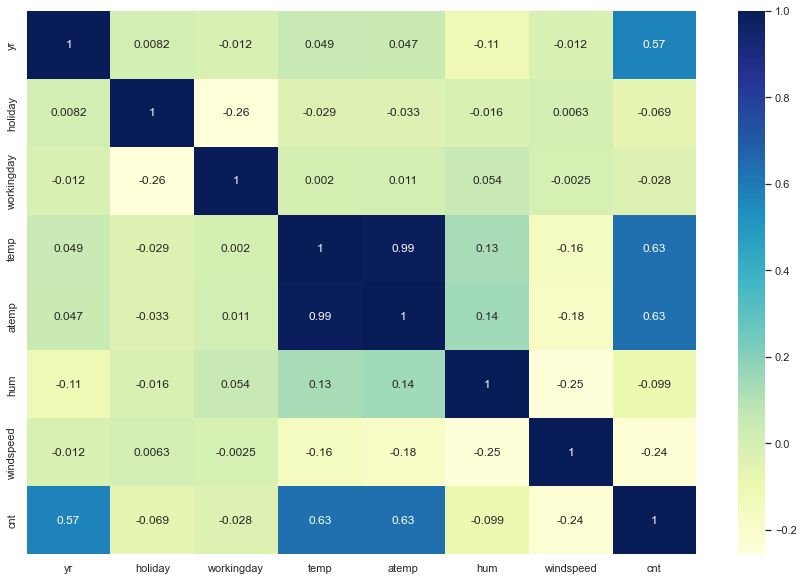

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(bike_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [16]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

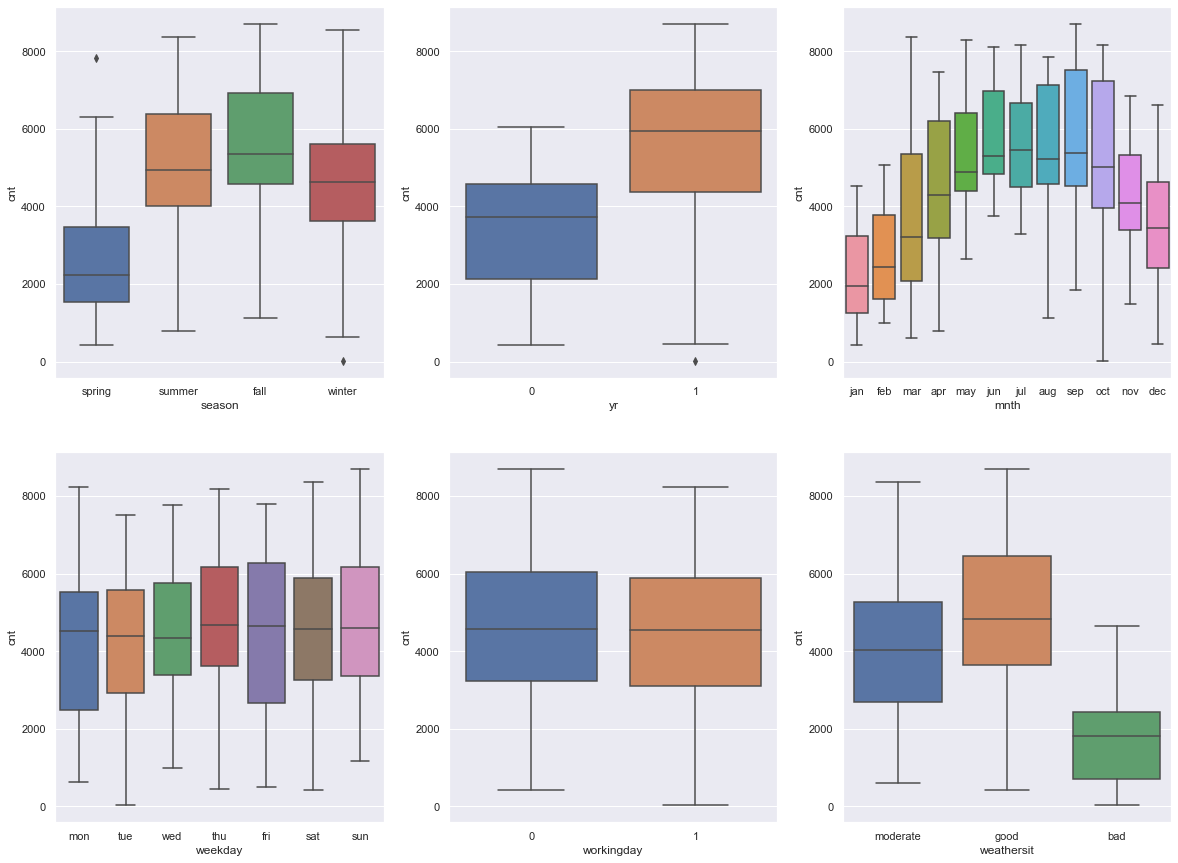

In [17]:
#Now visualising independent categorical variables with dependent variable to see the relation between them.
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=bike_df)

plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=bike_df)

plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=bike_df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt', data=bike_df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday', y='cnt', data=bike_df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit', y='cnt', data=bike_df)

In [18]:
bike_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Data preparation for linear regression

Creating dummy variables for categorical variables

In [19]:
bike_df = pd.get_dummies(data=bike_df, columns=["season", "mnth", "weekday"], drop_first=True)
bike_df = pd.get_dummies(data=bike_df, columns=["weathersit"])

bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [20]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


### Splitting Data into train and test data 

In [21]:
bike_df.shape

(730, 31)

In [22]:
#variable y contain target variable
y = bike_df.pop('cnt')

#variable X will contain all other remaining variable or independent variable
X = bike_df

#Train test split into 70:30 ratio 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [25]:
#Checking shape and size of train and test dataset
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


In [27]:
#now we scale continuoous variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

#using normalized scaler for scaling
scaler = MinMaxScaler()

#fit and transform training set
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [29]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [28]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


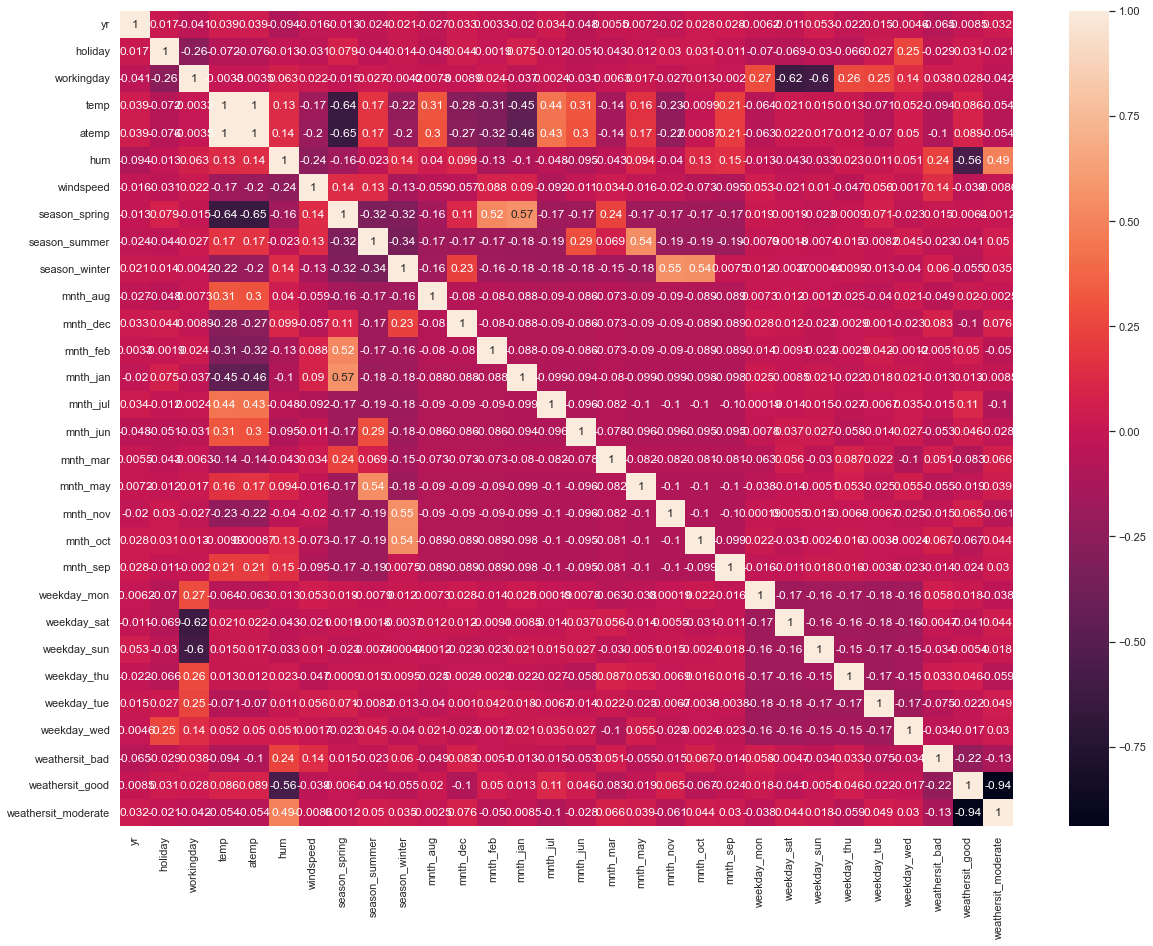

In [30]:
#checking if the variables are highly correlated
plt.figure(figsize=(20,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

### Build model using RFE

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
rfe = RFE(lr)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression())

In [54]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 8),
 ('season_winter', True, 1),
 ('mnth_aug', False, 13),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 15),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 4),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 5),
 ('weekday_sat', False, 12),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 6),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 3)]

In [55]:
#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [56]:
#Function to calculate VIF and print them
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by='VIF', ascending=False))

In [57]:
#Columns that is being selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sep', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [58]:
#Columns that are being rejected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_moderate'],
      dtype='object')

In [61]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [62]:
X_train_rfe.shape

(511, 15)

## ✍🏻Model (A)

In [63]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)        

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          1.70e-181
Time:                        12:43:21   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

## ✍🏻Model (B)

In [64]:
#Dropping hum column because it has high negative coef 
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     170.3
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          4.00e-179
Time:                        12:46:23   Log-Likelihood:                -4143.2
No. Observations:                 511   AIC:                             8316.
Df Residuals:                     496   BIC:                             8380.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2033.5612    

## ✍🏻Model (C)

In [66]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          1.35e-182
Time:                        18:36:17   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

## ✍🏻Model (D)

In [68]:
# Dropping the variable holiday as it has negative coefficient
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          1.51e-178
Time:                        18:39:05   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

## ✍🏻Model (E)

In [69]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sep', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          8.20e-179
Time:                        18:41:11   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1779.2943    

In [70]:
## Trying to replace July with spring as both were highly correlated
#removing of working_day and Summer

cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sep', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']
build_model(cols6)
get_vif(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          9.73e-178
Time:                        18:43:06   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

## ✍🏻Model (F)

In [97]:
cols7 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sep',
       'weathersit_bad', 'weathersit_moderate','temp']
build_model(cols7)
get_vif(cols7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     275.9
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          2.54e-178
Time:                        19:25:07   Log-Likelihood:                -4162.0
No. Observations:                 511   AIC:                             8342.
Df Residuals:                     502   BIC:                             8380.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1768.2553    

###### Here it seems that VIF value is good for all variable. P-value is also almost 0 in every features and r-sqaured is also 0.819 which is good for our model.

In [96]:
#now we will build a model with all columns to select features automatically.
def build_model_sk(X,y):
    lr1=LinearRegression()
    lr1.fit(X,y)
    return lr1

In [98]:
#now we build our final model with sklearn
lr = build_model_sk(X_train[cols7], y_train)
print(lr.intercept_, lr.coef_)

1768.2552600972936 [ 2001.22681426 -1173.79042894  -510.4915337    494.3823164
   469.72632731 -2267.51621398  -660.68218202  3975.95697567]


### Residual Analysis

In [99]:
y_train_pred = lr.predict(X_train[cols7])

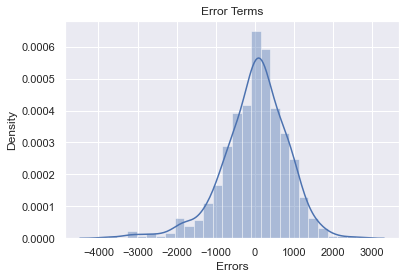

In [78]:
#We will plot a histogram for error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
    
plot_res_dist(y_train, y_train_pred)

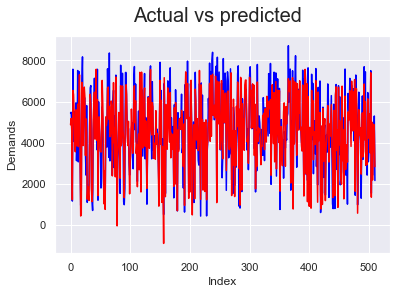

In [80]:
#Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c, y_train, color='blue')
plt.plot(c, y_train_pred, color='red')
plt.suptitle('Actual vs predicted', fontsize=20)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

## Model Predictions

#### R-Squared value for train predictions

In [81]:
r2_score(y_train, y_train_pred)

0.8158045196281631

#### Predictions of value on Test Dataset

In [101]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [108]:
cols7 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sep',
       'weathersit_bad', 'weathersit_moderate','temp']

In [109]:
#predicting the test data values
y_test_pred = lr.predict(X_test[cols7])

# Find out the R squared value between test and predicted test data sets.
r2_score(y_test, y_test_pred)

0.8109384786253465

## Evaluating the Model

In [110]:
y_pred = y_test_pred
r2_score(y_test, y_pred)

0.8109384786253465

Text(0, 0.5, 'y_pred')

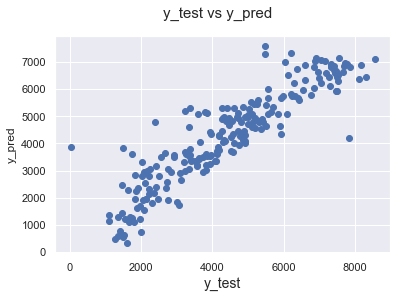

In [111]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [113]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols7 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sep',
       'weathersit_bad', 'weathersit_moderate','temp']

lm = build_model(cols7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     275.9
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          2.54e-178
Time:                        19:35:05   Log-Likelihood:                -4162.0
No. Observations:                 511   AIC:                             8342.
Df Residuals:                     502   BIC:                             8380.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1768.2553    

# Conclusion🙌

## Important Variables to predict the demand for shared bikes

###### Year
###### Temperature
###### Season- Winter & Spring
###### Months- July and September
###### Weather Situations- Bad and Moderate